In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/My Drive/Alura/Formação Data Science/1 - Análise e visualização de dados'

/content/drive/My Drive/Alura/Formação Data Science/1 - Análise e visualização de dados


In [3]:
import pandas as pd
import matplotlib.pyplot as plt # biblioteca mais baixo nível

# Aula 01

## Analisando notas em geral

In [4]:
notas = pd.read_csv('material/ml-latest-small/ratings.csv')

notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
notas['rating'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [6]:
notas['rating'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

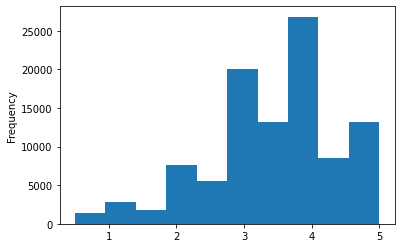

In [7]:
notas.rating.plot(kind='hist')

In [8]:
print("Media", notas.rating.mean())
print("Mediana", notas.rating.median())

Media 3.501556983616962
Mediana 3.5


In [9]:
notas.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


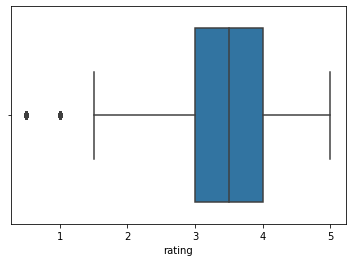

In [10]:
import seaborn as sns

sns.boxplot(notas.rating)

# Aula 02

## Olhando os filmes

In [11]:
filmes = pd.read_csv('material/ml-latest-small/movies.csv')

filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Analisando algumas notas específicas

In [13]:
notas.query("movieId==1")

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [14]:
notas.query("movieId==1").rating.mean()

3.9209302325581397

In [15]:
notas.query("movieId==2").rating.mean()

3.4318181818181817

In [16]:
medias_por_filme = notas.groupby("movieId").rating.mean()
medias_por_filme.tail()

movieId
193581    4.0
193583    3.5
193585    3.5
193587    3.5
193609    4.0
Name: rating, dtype: float64

In [17]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: rating, dtype: float64

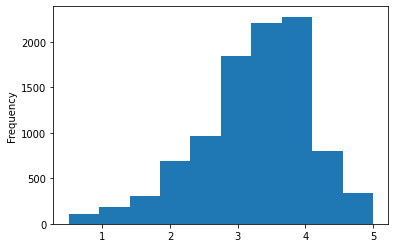

In [18]:
medias_por_filme.plot(kind='hist')

Text(0.5, 1.0, 'Histograma das médias dos filmes')

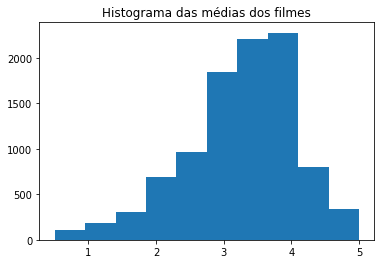

In [19]:
plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


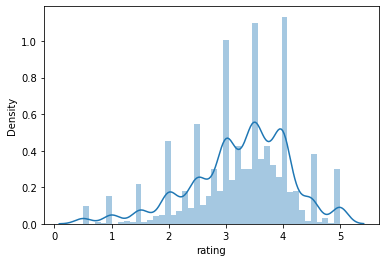

In [20]:
sns.distplot(medias_por_filme)

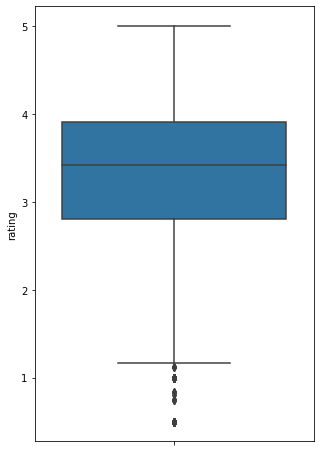

In [21]:
plt.figure(figsize=(5,8))
sns.boxplot(y=medias_por_filme)

# Aula 03

In [22]:
tmdb = pd.read_csv('material/TMDB/tmdb_5000_movies.csv')

tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [23]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [24]:
# quantidade de votos => 1, 2, 3, 4, nao tem 2.5 votos.
# notas do movielens => 0.5, 1, 1.5, ... ,5 nao tem 2.7

# Aula 04

In [25]:
tmdb["original_language"].value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64

In [26]:
tmdb["original_language"].value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi',
       'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te',
       'el'],
      dtype='object')

In [27]:
tmdb["original_language"].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [28]:
# baixo nível
contagem_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_lingua.columns = ["original_language", "total"]
contagem_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


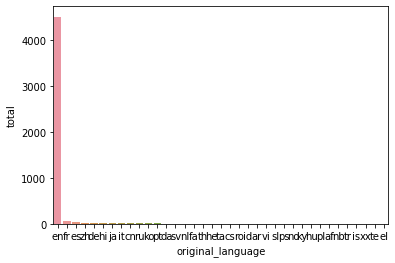

In [29]:
# baixo nível - gráfico ruim
sns.barplot(data=contagem_lingua, x="original_language", y="total")

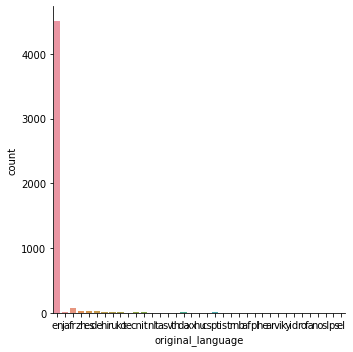

In [30]:
# alto nível - gráfico ruim
sns.catplot(x="original_language", kind="count", data=tmdb)

In [31]:
# vamos isolar os dados, pois a maioria é inglês
# iremos comparar inglês X demais línguas

total_lingua = tmdb["original_language"].value_counts()
total_geral = total_lingua.sum()
total_ingles = total_lingua.loc["en"]
total_resto = total_geral - total_ingles

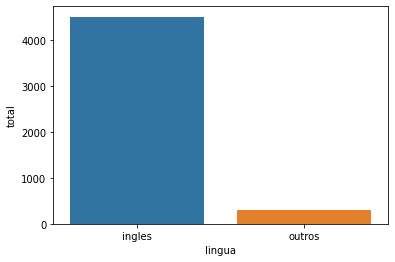

In [32]:
dados = {
    'lingua' : ['ingles', 'outros'],  
    'total' : [total_ingles, total_resto]
}

dados = pd.DataFrame(dados)
sns.barplot(data=dados, x="lingua", y="total")

([<matplotlib.patches.Wedge at 0x7f4f34b93990>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

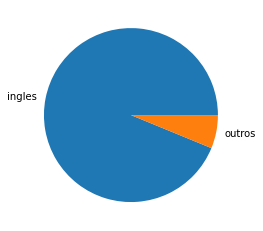

In [33]:
# o grafico de barras apresenta o resultado melhor que pizza
plt.pie(dados["total"], labels=dados["lingua"])

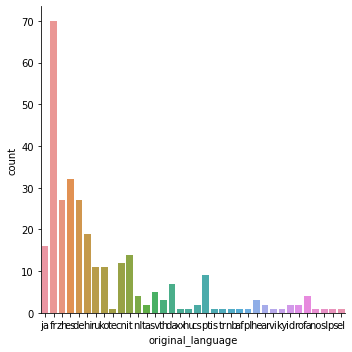

In [34]:
# agora vamos olhar somente para os filmes de outras línguas
filmes_lingua_nao_ingles = tmdb.query("original_language != 'en'")
sns.catplot(x="original_language", kind="count", data=filmes_lingua_nao_ingles)

# Aula 5

In [35]:
total_filmes_lingua_nao_ingles = tmdb.query("original_language != 'en'").original_language.value_counts()
total_filmes_lingua_nao_ingles

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: original_language, dtype: int64

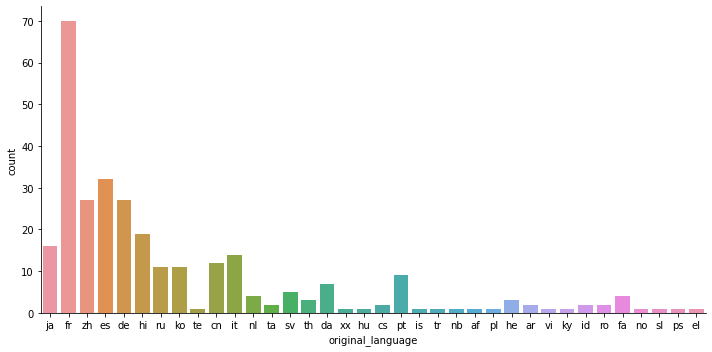

In [36]:
sns.catplot(x="original_language", kind="count", data=filmes_lingua_nao_ingles,
            aspect=2)

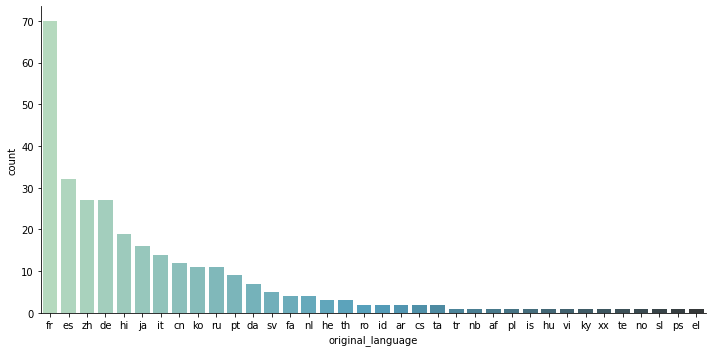

In [37]:
sns.catplot(x="original_language", kind="count", data=filmes_lingua_nao_ingles,
            aspect=2, palette="GnBu_d",
            order=total_filmes_lingua_nao_ingles.index)

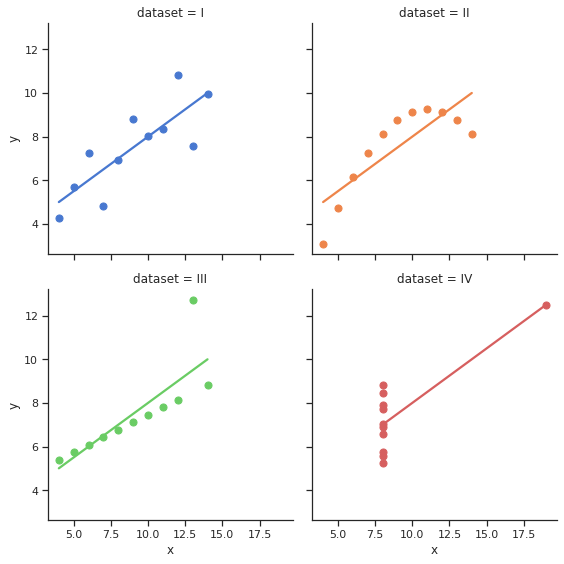

In [38]:
# Exemplo Extra

sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

# Aula 06

In [40]:
filmes.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [44]:
notas_toy_story = notas.query("movieId==1")
notas_jumanji = notas.query("movieId==2")
print(len(notas_toy_story), len(notas_jumanji))

215 110


#### Revisando a média, mediana, medidas de tendêncial central, dispersão, desvio padrão, boxplot, histograma

In [45]:
print("Nota média do Toy Story: %.2f " % notas_toy_story["rating"].mean())
print("Nota média do Jumanji: %.2f " % notas_jumanji["rating"].mean())

Nota média do Toy Story: 3.92 
Nota média do Jumanji: 3.43 


In [46]:
print("Nota média do Toy Story: %.2f " % notas_toy_story["rating"].median())
print("Nota média do Jumanji: %.2f " % notas_jumanji["rating"].median())

Nota média do Toy Story: 4.00 
Nota média do Jumanji: 3.50 


In [49]:
import numpy as np

filme1 = np.append(np.array([[2.5] * 10]), np.array([[3.5] * 10]))
filme2 = np.append(np.array([[5] * 10]), np.array([[1] * 10]))

In [62]:
print(filme1.mean(), filme2.mean())
print(np.median(filme1), np.median(filme2))
print(filme1.std(), filme2.std())

3.0 3.0
3.0 3.0
0.5 2.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

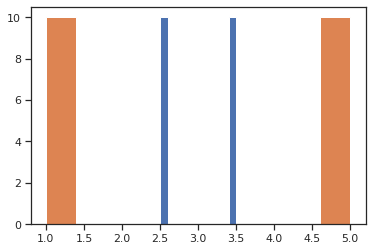

In [51]:
plt.hist(filme1)
plt.hist(filme2)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4f2dc75610>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4f2dc5c450>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4f2dc00bd0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f4f2dc4b1d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4f2dc70e50>,
 'means': []}

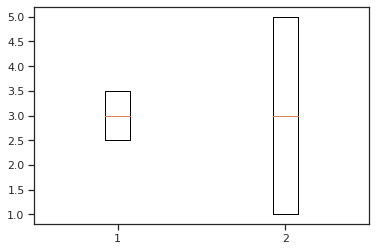

In [52]:
plt.boxplot([filme1, filme2])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


{'whiskers': [<matplotlib.lines.Line2D at 0x7f4f2dbd5910>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4f2dbeea10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4f2dbde110>,
 'medians': [<matplotlib.lines.Line2D at 0x7f4f2dc5a290>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4f2dbf0cd0>,
 'means': []}

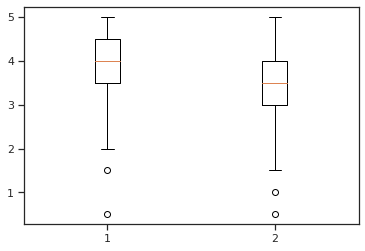

In [53]:
plt.boxplot([notas_toy_story.rating, notas_jumanji.rating])

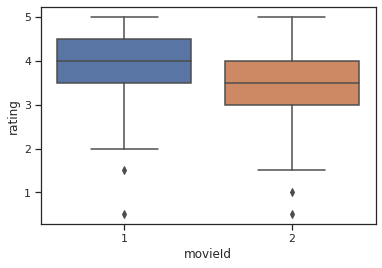

In [58]:
sns.boxplot(data = notas.query("movieId in [1,2]"), x="movieId", y="rating")

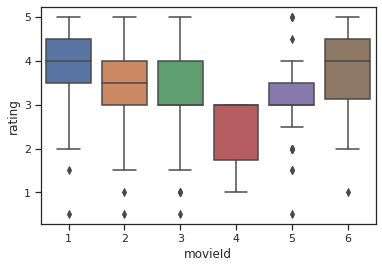

In [59]:
sns.boxplot(data = notas.query("movieId in [1,2,3,4,5,6]"), x="movieId", y="rating")

In [60]:
print(notas_jumanji.rating.std())
print(notas_toy_story.rating.std())

0.8817134921476455
0.8348591407114047
